In [1]:
using Pkg
Pkg.activate("../.")

  Activating project at `~/Documents/code/julia/CompFin/notebooks`


In [2]:
using CompFin: GBM, compute_runge_kutta_step, simulate_path, simulate_mc_paths

In [3]:
# Setup

mu = 0.05;
sigma = 0.2;
gbm = GBM(mu, sigma);
x0 = 100.0;

T = 1.0;
n_steps = 100;
dt = T/n_steps;
n_paths = 10000;

In [4]:
xt_stepwise = simulate_mc_paths(gbm, x0, dt, compute_runge_kutta_step, n_steps, n_paths, false);
xt_pathwise = simulate_mc_paths(gbm, x0, dt, compute_runge_kutta_step, n_steps, n_paths, true);

In [5]:
# Let's check that both simulations return the same shapes i.e. 1000 paths and 101 values (1 initial and 100 simulated ones)
size(xt_stepwise) == size(xt_pathwise)

true

In [6]:
using Plots
using Random: randsubseq
using Statistics: mean, std, quantile
using Distributions: Normal

In [7]:
function compute_confidence_interval(avg::Float64, std::Float64, n_samples::Int64, alpha::Float64)::Vector{Float64}
    q = quantile(Normal(0.0, 1.0), 1 - (1 - alpha)/2)

    avg_low = avg - (q*std)/sqrt(n_samples)
    avg_high = avg + (q*std)/sqrt(n_samples)

    return [avg_low; avg_high]
end

compute_confidence_interval (generic function with 1 method)

In [8]:
xt_std = std(xt_stepwise, dims=1);
xt_mean = mean(xt_stepwise, dims=1);
xt_ci = compute_confidence_interval.(0.0, xt_std, n_paths, 0.95);
xt_ci_down = [xt_ci[i][1] for i = 1:n_steps + 1];
xt_ci_up = [xt_ci[i][2] for i = 1:n_steps + 1];
subseq = randsubseq(1:n_paths, 0.005);
xt_stepwise_subset = xt_stepwise[subseq, :];

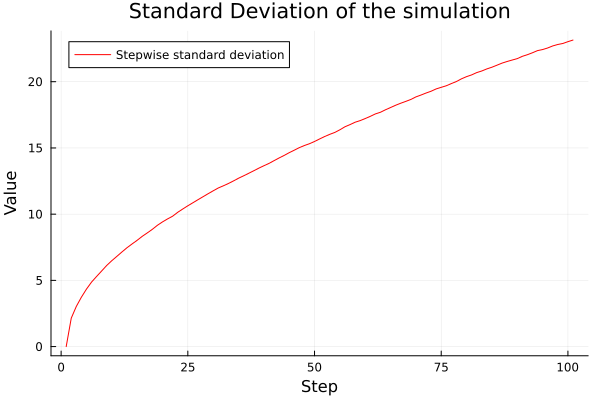

In [9]:
std_plot = plot(1:n_steps + 1, xt_std', label="Stepwise standard deviation", title="Standard Deviation of the simulation", xlabel="Step", ylabel="Value", color="red")

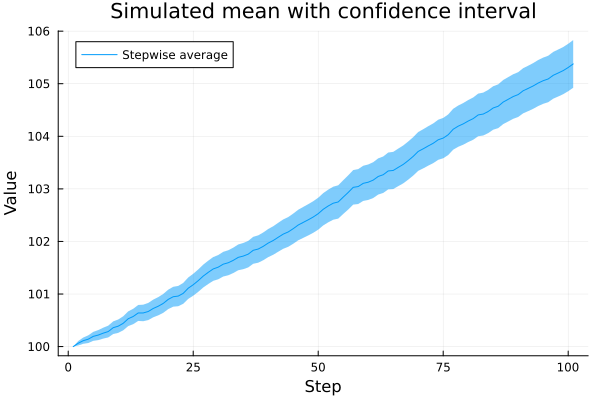

In [10]:
mean_ci_plot = plot(1:n_steps + 1, xt_mean', ribbon=[xt_ci_down xt_ci_up], label="Stepwise average", title="Simulated mean with confidence interval", xlabel="Step", ylabel="Value")

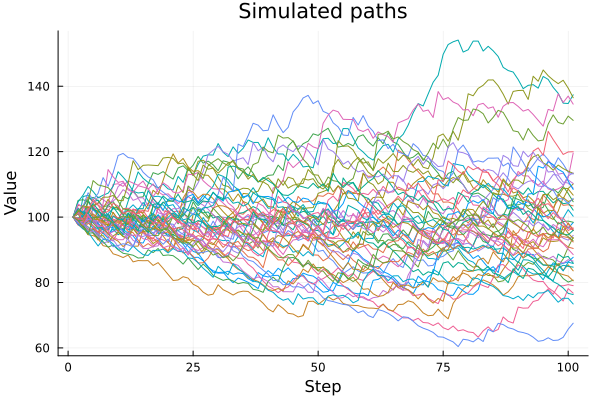

In [11]:
paths_plot = plot(1:n_steps + 1, xt_stepwise_subset', legend=false, title="Simulated paths", xlabel="Step", ylabel="Value")